# **Proyecto 2** – Modelos de clasificación supervisada para evaluar la calidad del vino de Portugal 

**Integrates del equipo:**
 
Javier Callejas Cardozo
 
Oscar Ivan Echeverria Marrugo
 
Fabian Andrés Parrado Velásquez
 
Xiomara Grisales Henao

## **Explicación breve de los datos**

En la referencia anterior, se crearon dos conjuntos de datos, utilizando muestras de vino tinto y blanco.
Las entradas incluyen pruebas objetivas (por ejemplo, valores de pH) y la salida se basa en datos sensoriales
(mediana de al menos 3 evaluaciones realizadas por expertos en vinos). Cada experto calificó la calidad del vino
entre 0 (muy mala) y 10 (muy excelente). Se aplicaron varios métodos de minería de datos para modelar
estos conjuntos de datos bajo un enfoque de regresión. El modelo de máquina de vectores de soporte logró los
mejores resultados. Se calcularon varias métricas: MAD, matriz de confusión para una tolerancia de error fija (T),
etc. Además, graficamos las importancias relativas de las variables de entrada (medidas mediante un procedimiento de análisis de sensibilidad)

Los dos conjuntos de datos están relacionados con las variantes roja y blanca del vino portugués "Vinho Verde".
Para más detalles, consulte: http://www.vinhoverde.pt/en/ o la referencia [Cortez et al., 2009].
Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas (entradas) y sensoriales (salida) (p. ej., no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.).

Estos conjuntos de datos pueden considerarse como tareas de clasificación o regresión.
Las clases están ordenadas y no equilibradas (p. ej., hay muchos más vinos normales que excelentes o malos). Se podrían utilizar algoritmos de detección de valores atípicos para detectar los pocos vinos excelentes o malos. Además, no estamos seguros de si todas las variables de entrada son relevantes. Por lo tanto,
podría ser interesante probar métodos de selección de características.

Variables de entrada (basadas en pruebas fisicoquímicas): 1 - acidez fija 2 - acidez volátil 3 - ácido cítrico 4 - azúcar residual 5 - cloruros 6 - dióxido de azufre libre 7 - dióxido de azufre total 8 - densidad 9 - pH 10 - sulfatos 11 - alcohol Variable de salida (basada en datos sensoriales): 12 - calidad (puntuación entre 0 y 10)

## **Diccionario**

| **Nombre   de la variable** | **Definición**                               | **Naturaleza** | **Tipo**   |
|------------------------------|-----------------------------------------------|-----------------|-------------|
| **Variables de entrada**    |                                               |                 |             |
| **fixed_acidity**            | Acidez fija                                   | Cuantitativa    | Continua    |
| **volatile_acidity**         | Acidez volátil                                | Cuantitativa    | Continua    |
| **citric_acid**              | Ácido cítrico                                 | Cuantitativa    | Continua    |
| **residual_sugar**           | Azúcar residual                               | Cuantitativa    | Continua    |
| **chlorides**                | Cloruros                                      | Cuantitativa    | Continua    |
| **free_sulfur_dioxide**      | Dioxido de azufre llibre                      | Cuantitativa    | Continua    |
| **total_sulfur_dioxide**     | Dióxido de azufre total                       | Cuantitativa    | Continua    |
| **density**                  | Densidad                                      | Cuantitativa    | Continua    |
| **pH**                       | pH                                            | Cuantitativa    | Continua    |
| **sulphates**                | Sulfatos                                      | Cuantitativa    | Continua    |
| **alcohol**                 | Alcohol                                       | Cuantitativa    | Continua    |
| **Variable de salida**      |                                               |                 |             |
| **quality**                 | Calidad (Puntuación entre 0 - 10)             | Cualitativa    |             |
| **Otro**                    |                                               |                 |             |
| **type_wine**                | Tipo de vino [1\|Vino blanco], [2\|Vino tinto] | Cualitativa     | Dicotómica  |

## **Preprocesamiento de Datos**

## **Importación de Librerías**

Primero, importamos todas las librerías necesarias. Estas incluyen herramientas de manipulación de datos (`pandas`, `numpy`), visualización (`seaborn`, `matplotlib`), y preprocesamiento (`scikit-learn`).

In [898]:
### Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump


## **Carga de los Datos**

Vamos a cargar dos conjuntos de datos que contienen información de la calidad de los vinos de Portugal. Este dataset proviene de `winequality-red.csv` y `winequality-white.csv`, un conjunto de datos comúnmente utilizado para predecir la calidad del vino basado en las propiedades del vino.

In [899]:
#1 Cargamos los datos
df_red =pd.read_csv("../Datos/winequality-red.csv", sep = ';', encoding = 'latin-1')
df_white =pd.read_csv("../Datos/winequality-white.csv", sep = ';', encoding = 'latin-1')

## **Exploración de Datos por Base de Datos**

Es importante conocer la estructura de los datos antes de preprocesarlos. Vamos a visualizar las primeras filas y también la estructura de tipos de datos en cada columna por base de datos.

### **Base de Datos del Red Wine (Vino Tinto)**

Visualizamos la base de datos 

In [900]:
# Visualización de la base de datos 
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Se revisan los 3 primeros y 3 últimos registros del dataset, así también como las columnas, índices, tipos de registros y obtenemos una muestra aleatoria para conocer más los datos a analizar y conocer su comportamiento.

In [901]:
display("primeros 3 registros",df_red.head(3))
display("3 últimos registros",df_red.tail(3))
display("Columnas:",df_red.columns)
display("Índices:",df_red.index)
display("Tipos de registros en el DataFrame",df_red.dtypes)
display("Muestra aleatoria de 3 registros",df_red.sample(3))

'primeros 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


'3 últimos registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


'Columnas:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=1599, step=1)

'Tipos de registros en el DataFrame'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

'Muestra aleatoria de 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1439,7.3,0.67,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6
236,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.000000,6
583,12.0,0.28,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.900000,7


In [902]:
# Vista rápida del tamaño del dataset y la info de los mismos
df_red.shape
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### **Eliminación de Columnas Irrelevantes del Vino Tinto**

En muchos casos, algunos datos no aportan valor a nuestro modelo o pueden estar altamente correlacionados con otras variables, analizamos las filas duplicadas y los valores nulos.

In [903]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_red.shape}')
 
#Eliminamos filas duplicadas de la DB
df = df_red.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas
 
print(f'Tamaño del set después de eliminar las filas repetidas: {df_red.shape}')
#Se evidencia que no se encuentran valores duplicados
df_red

Tamaño del set antes de eliminar las filas repetidas: (1599, 12)
Tamaño del set después de eliminar las filas repetidas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [904]:
# Identificar valores nulos
display(df_red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Base de Datos del White Wine (Vino Blanco)**

Visualizamos la base de datos 

In [905]:
# Visualización de la base de datos 
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Se revisan los 3 primeros y 3 últimos registros del dataset, así también como las columnas, índices, tipos de registros y obtenemos una muestra aleatoria para conocer más los datos a analizar y conocer su comportamiento.

In [906]:
display("primeros 3 registros",df_white.head(3))
display("3 últimos registros",df_white.tail(3))
display("Columnas:",df_white.columns)
display("Índices:",df_white.index)
display("Tipos de registros en el DataFrame",df_white.dtypes)
display("Muestra aleatoria de 3 registros",df_white.sample(3))

'primeros 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


'3 últimos registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


'Columnas:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=4898, step=1)

'Tipos de registros en el DataFrame'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

'Muestra aleatoria de 3 registros'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3626,7.0,0.29,0.33,0.9,0.041,20.0,117.0,0.99048,3.21,0.50,11.4,5
2795,6.4,0.22,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
2683,7.1,0.31,0.17,1.0,0.042,21.0,144.0,0.99304,3.13,0.40,9.6,5


In [907]:
# Vista rápida del tamaño del dataset y la info de los mismos
df_white.shape
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### **Eliminación de Columnas Irrelevantes del Vino Blanco**

En muchos casos, algunos datos no aportan valor a nuestro modelo o pueden estar altamente correlacionados con otras variables, analizamos las filas duplicadas y los valores nulos.

In [908]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_white.shape}')
 
#Eliminamos filas duplicadas de la DB
df = df_white.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas
 
print(f'Tamaño del set después de eliminar las filas repetidas: {df_white.shape}')
#Se evidencia que no se encuentran valores duplicados
df_white

Tamaño del set antes de eliminar las filas repetidas: (4898, 12)
Tamaño del set después de eliminar las filas repetidas: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [909]:
# Identificar valores nulos
display(df_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Cálculo de Estadísticos para ambos Datasets**

Base de datos del Vino Rojo 

In [910]:
df_red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Base de datos del Vino Blanco 

In [911]:
df_white.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### **Histograma de la calidad por tipo de vino**

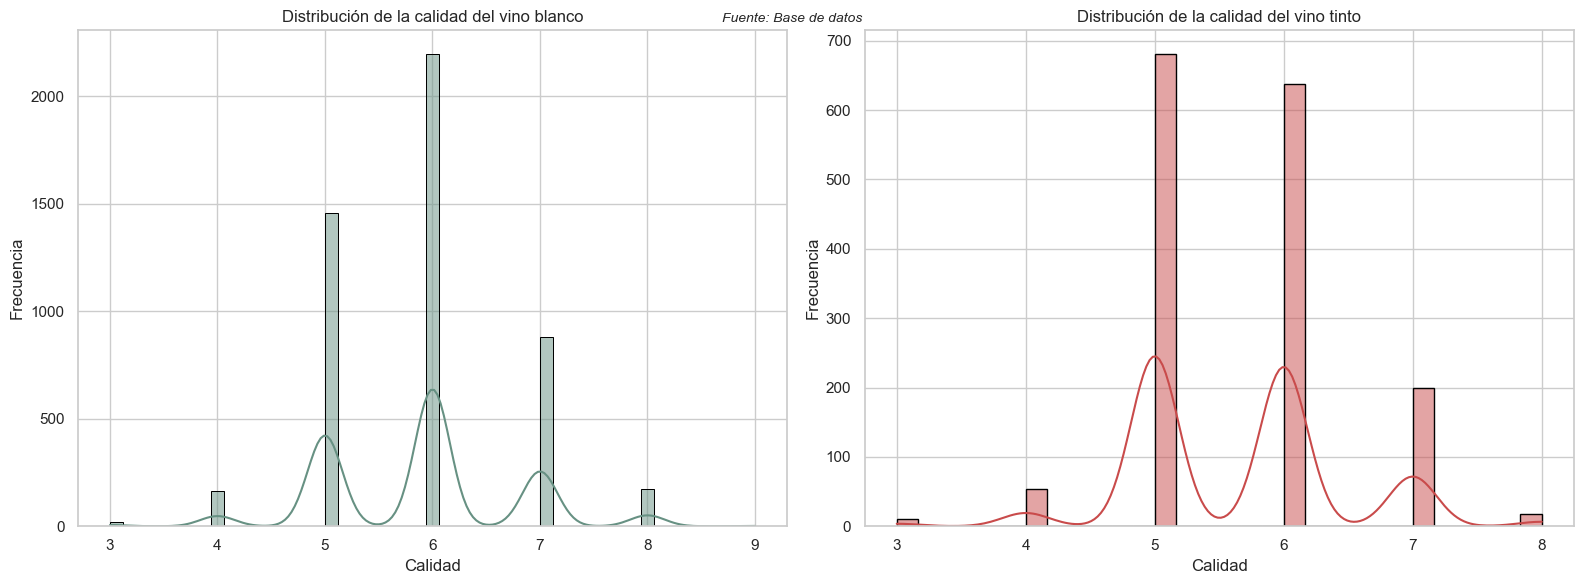

In [912]:
# Configuración de estilo
sns.set(style='whitegrid')

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para vino blanco
sns.histplot(df_white['quality'], kde=True, color='#679183', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribución de la calidad del vino blanco')
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Histograma para type_wine = 2
sns.histplot(df_red['quality'], kde=True, color='#c94b4b', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribución de la calidad del vino tinto')
axes[1].set_xlabel('Calidad')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Agregar la fuente de datos en la figura principal
plt.figtext(0.5, 0.95, 'Fuente: Base de datos', ha='center', fontsize=10, style='italic')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

La gráfica muestra la distribución de la calidad de dos tipos de vino: vino blanco (a la izquierda) y vino tinto (a la derecha). A continuación se pueden hacer algunas observaciones:

**Distribución de la Calidad:**

La calidad de ambos tipos de vino se concentra en un rango de valores entre 3 y 8.

El vino blanco tiene un pico principal alrededor de la calificación 6, mientras que el vino tinto muestra una mayor concentración en las calificaciones 5 y 6.

**Forma de la Distribución:**

En el caso del vino blanco, la distribución tiene una forma aproximadamente simétrica y se inclina hacia valores de calidad entre 5 y 7.

Para el vino tinto, la distribución es un poco más dispersa pero también se centra en los valores 5 y 6, con un ligero sesgo hacia la calificación 5.

**Frecuencia:**

La frecuencia de vinos con calidad de 6 es significativamente alta en ambos casos, especialmente en el vino blanco.
Hay una menor cantidad de vinos con calificaciones extremas (3 y 8 en ambos tipos de vino).

**Comparación entre Blanco y Tinto:**

En términos generales, el vino blanco tiene una mayor cantidad de observaciones en calificaciones altas (6 y 7), mientras que el vino tinto se distribuye más uniformemente entre 5 y 6.

Esto podría sugerir que, en promedio, el vino blanco de esta base de datos tiene una ligera tendencia a obtener calificaciones de calidad más altas que el vino tinto.

Esta gráfica sugiere que ambos tipos de vino tienen una distribución de calidades concentrada en calificaciones medias (5 y 6), con una leve inclinación hacia calificaciones más altas en el caso del vino blanco.

### **Concatenación de las Bases de Datos**

Se identifica que las dos bases tienen las mismas cantidad columnas no tienen nulos ni valores repetidos, por lo cual se agrega una nueva columna que identifique si el tipo de vino es blanco o rojo, se hace de la siguinte manera: 

*Vino Blanco* = 1  *Vino Rojo* = 2

 Esto con el fin de unir las bases de datos para su futuro manejo. 

In [913]:
# Agregar una columna para identificar el tipo de vino

df_white.insert(0, "type_wine", 1)
df_red.insert(0, "type_wine", 2)

In [914]:
# Verificación de la nueva columna en df_white
df_white.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [915]:
# Verificación de la nueva columna en df_red
df_red.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [916]:
# Se consulta la cantidad de filas de los dos data set para verificarlo después de la concatenación
display(df_red.shape)
display(df_white.shape)

(1599, 13)

(4898, 13)

Concatenación de las Bases de Datos 

In [917]:
# Se procede a concatenar los dos data set df_red y df_white
df_wine_total = pd.concat([df_red, df_white])

In [918]:
# Verificación de columnas en el nuevo data_set df_wine_total
df_wine_total.shape

(6497, 13)

In [919]:
# Se visualizan las primeras filas del nuevo data set
df_wine_total.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Clasificación de la columna Calidad 'quality'** 

Se realizó un análisis exhaustivo de las bases de datos y el equipo de trabajo concluyó que por ejecución del ejercicio y la viabilidad de los modelos, optamos por clasificar la columna de la calidad de los vinos de la siguiente forma: 

**3 [calidad alta]** = Valores [7, 8, 9]

**2 [calidad media]** = Valores [5, 6]

**1 [calidad baja]** = Valores [1, 2, 3]

Y los reemplazamos en la base de datos concatenada

In [920]:
df_wine_total['quality'] = df_wine_total['quality'].replace({3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3})

In [921]:
# Se visualizan las primeras filas del nuevo data set
df_wine_total.head()

,type_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


Verificación del reemplazo de valores

In [922]:
df_wine_total.quality.value_counts()

quality
2    4974
3    1277
1     246
Name: count, dtype: int64

#### **Gráfica de la nueva distribución**

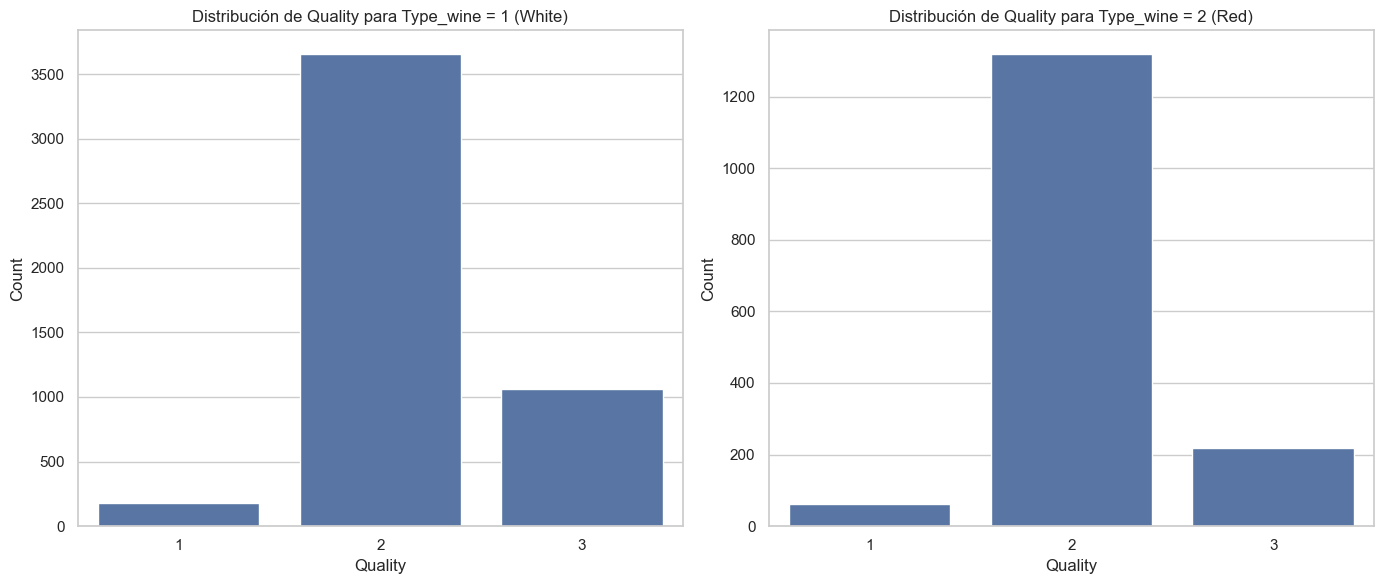

In [923]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de conteo para type_wine = 1
sns.countplot(x='quality', data=df_wine_total[df_wine_total['type_wine'] == 1], ax=axes[0])
axes[0].set_title('Distribución de Quality para Type_wine = 1 (White)')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

# Gráfico de conteo para type_wine = 2
sns.countplot(x='quality', data=df_wine_total[df_wine_total['type_wine'] == 2], ax=axes[1])
axes[1].set_title('Distribución de Quality para Type_wine = 2 (Red)')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Count')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

### **Gráficas de la Base de Datos**

#### **Diagrama de Caja y Bigotes para cada propiedad del Vino Blanco**

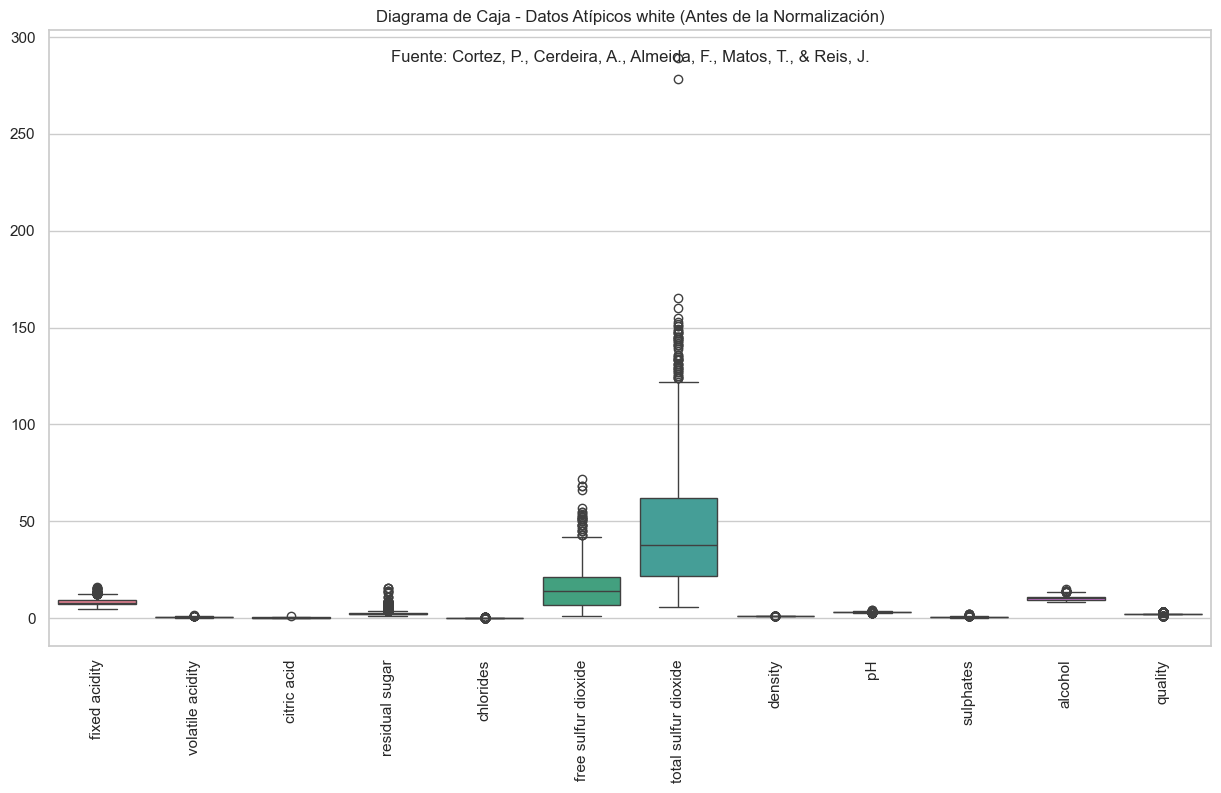

In [924]:
# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Filtrar el DataFrame para obtener solo los datos con type_wine = 1
df_type1 = df_wine_total[df_wine_total['type_wine'] == 1]

# Seleccionar automáticamente todas las columnas numéricas del DataFrame filtrado
df_num_type1 = df_type1.select_dtypes(include=['number']).drop(columns=['type_wine'])

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num_type2)
plt.title('Diagrama de Caja - Datos Atípicos white (Antes de la Normalización)')
plt.text(x=0.5, y=0.95, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

#### **Diagrama de Caja y Bigotes para cada propiedad del Vino Tinto**

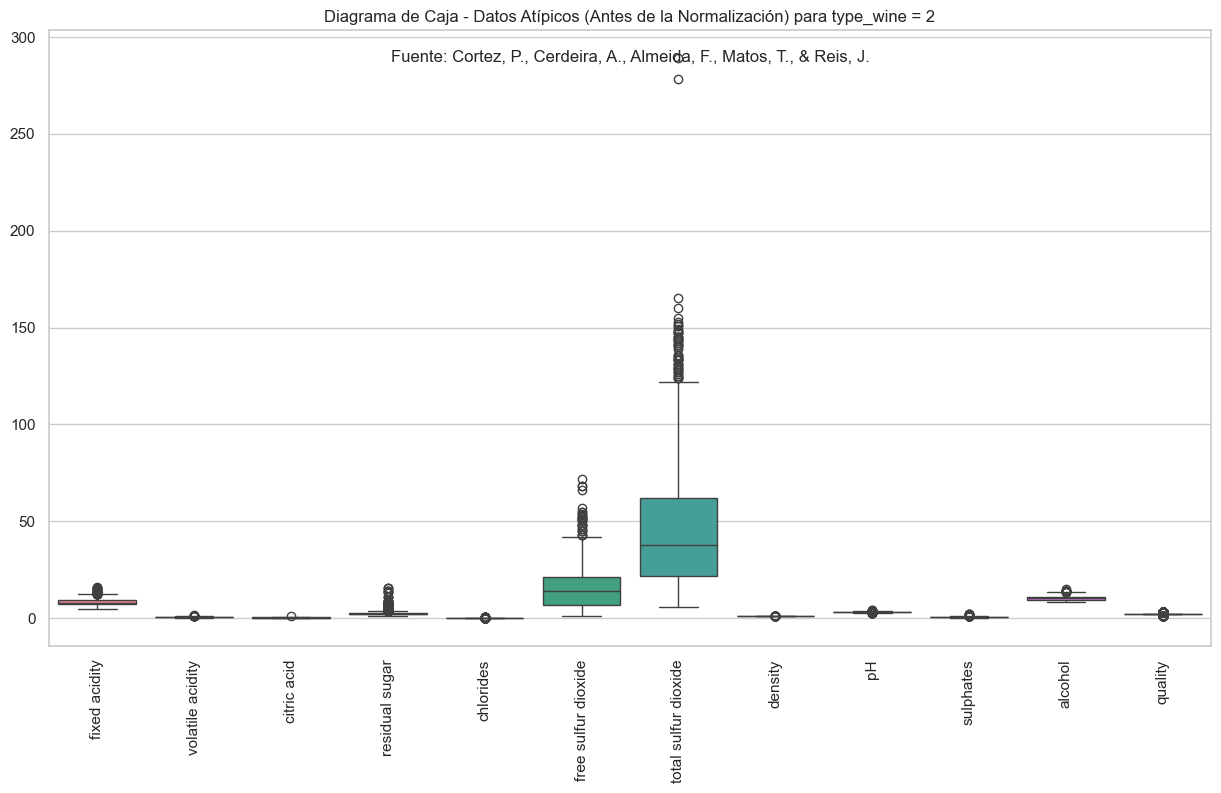

In [925]:
# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Filtrar el DataFrame para obtener solo los datos con type_wine = 2
df_type2 = df_wine_total[df_wine_total['type_wine'] == 2]

# Seleccionar automáticamente todas las columnas numéricas del DataFrame filtrado
df_num_type2 = df_type2.select_dtypes(include=['number']).drop(columns=['type_wine'])

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num_type2)
plt.title('Diagrama de Caja - Datos Atípicos (Antes de la Normalización) para type_wine = 2')
plt.text(x=0.5, y=0.95, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

#### **Normalización de los Datos para mejor Visualización**

Normalización base de datos solo para el vino blanco

In [926]:
scaler = MinMaxScaler()
# ajustar y transformar el data frame del vino blanco = 1
scaled_data = scaler.fit_transform(df_num_type1)
# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_scaled = pd.DataFrame(scaled_data, columns=df_num_type1.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


Normalización base de datos solo para el vino tinto

In [927]:
# ajustar y transformar el data frame del vino tinto = 2
scaled_data1 = scaler.fit_transform(df_num_type2)
# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_scaled1 = pd.DataFrame(scaled_data, columns=df_num_type2.columns)
df_scaled1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


#### **Diagrama de Caja y Bigotes para cada propiedad del Vino Blanco Normalizado**

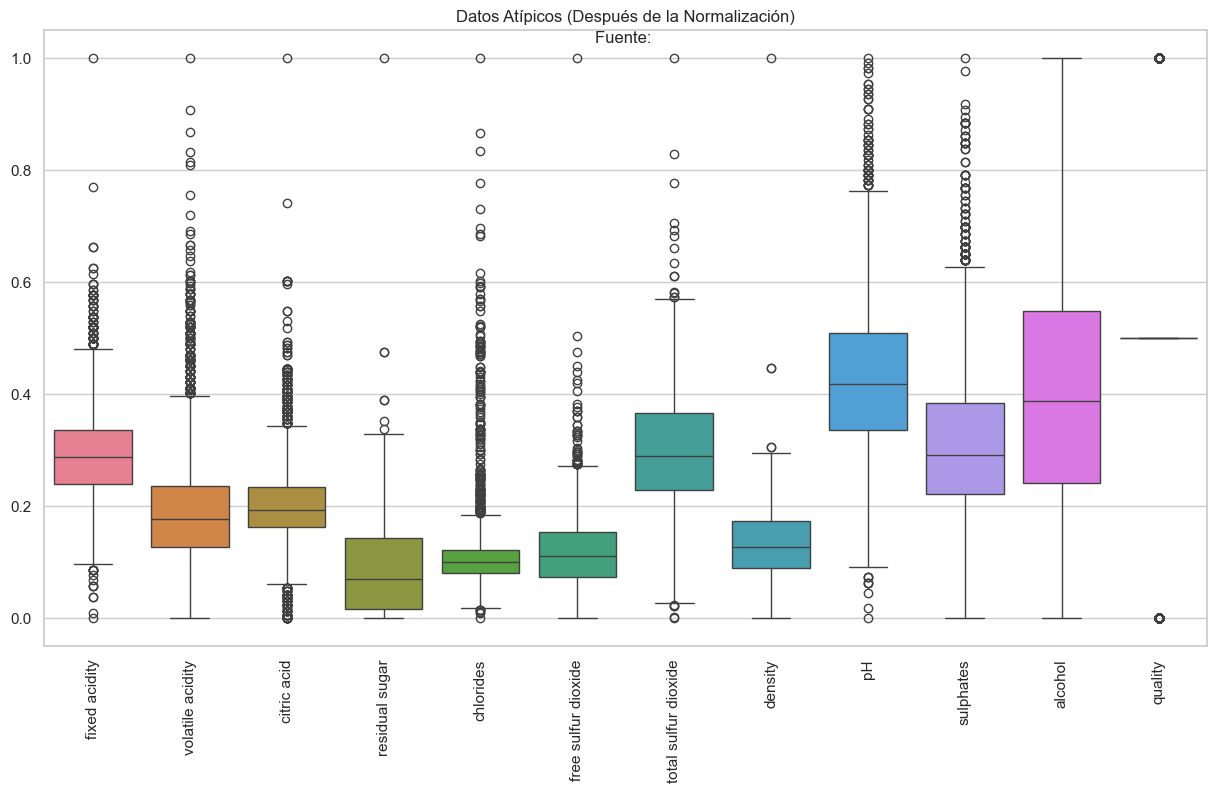

In [928]:
# Diagrama de caja para los datos escalados pra vino tinto
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled1)
plt.title('Datos Atípicos (Después de la Normalización)')
plt.text(x=0.5, y=0.98, s='Fuente: ', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

#### **Diagrama de Caja y Bigotes para cada propiedad del Vino Tinto Normalizado**

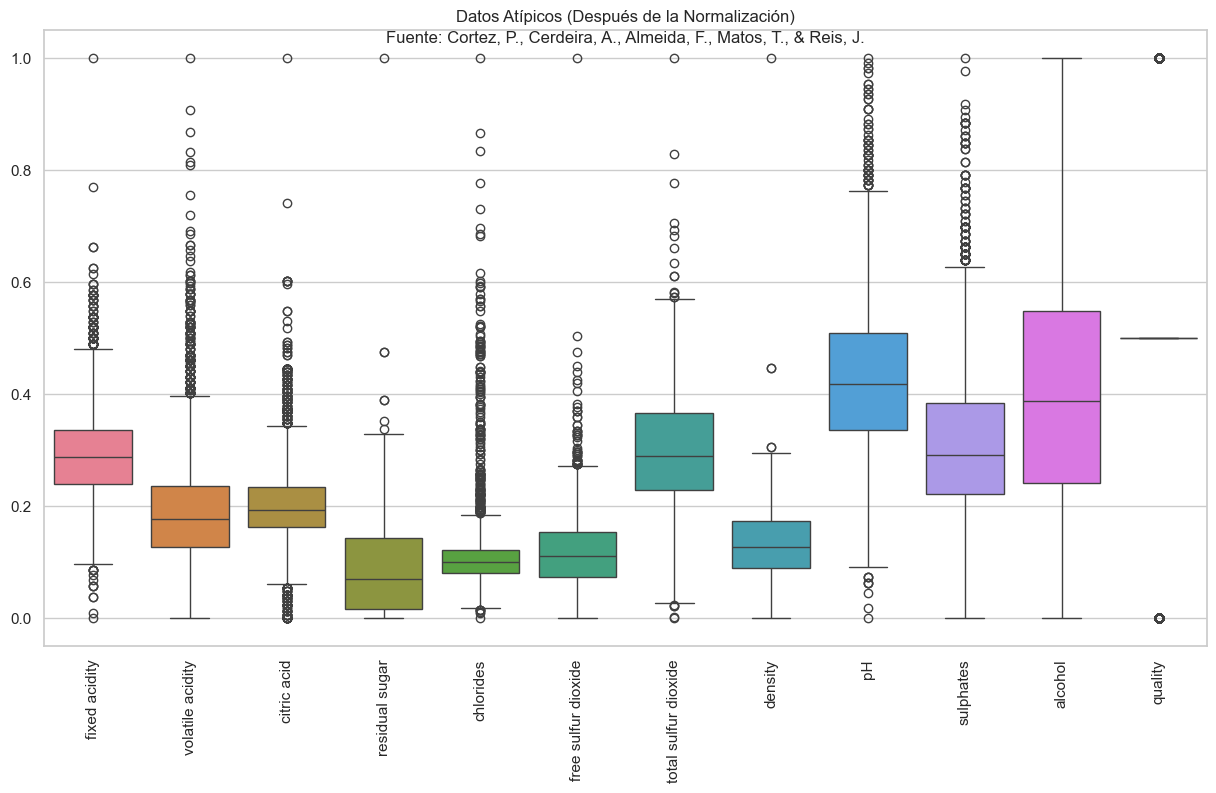

In [929]:
# Diagrama de caja para los datos escalados pra vino tinto
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled1)
plt.title('Datos Atípicos (Después de la Normalización)')
plt.text(x=0.5, y=0.98, s='Fuente: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

### **Mapa de calor**

Una matriz de correlación y un mapa de calor son herramientas estadísticas útiles en el análisis de datos para entender la relación entre diferentes variables de una base de datos, procedemos a realizar el correspondiente análisis para el modelo

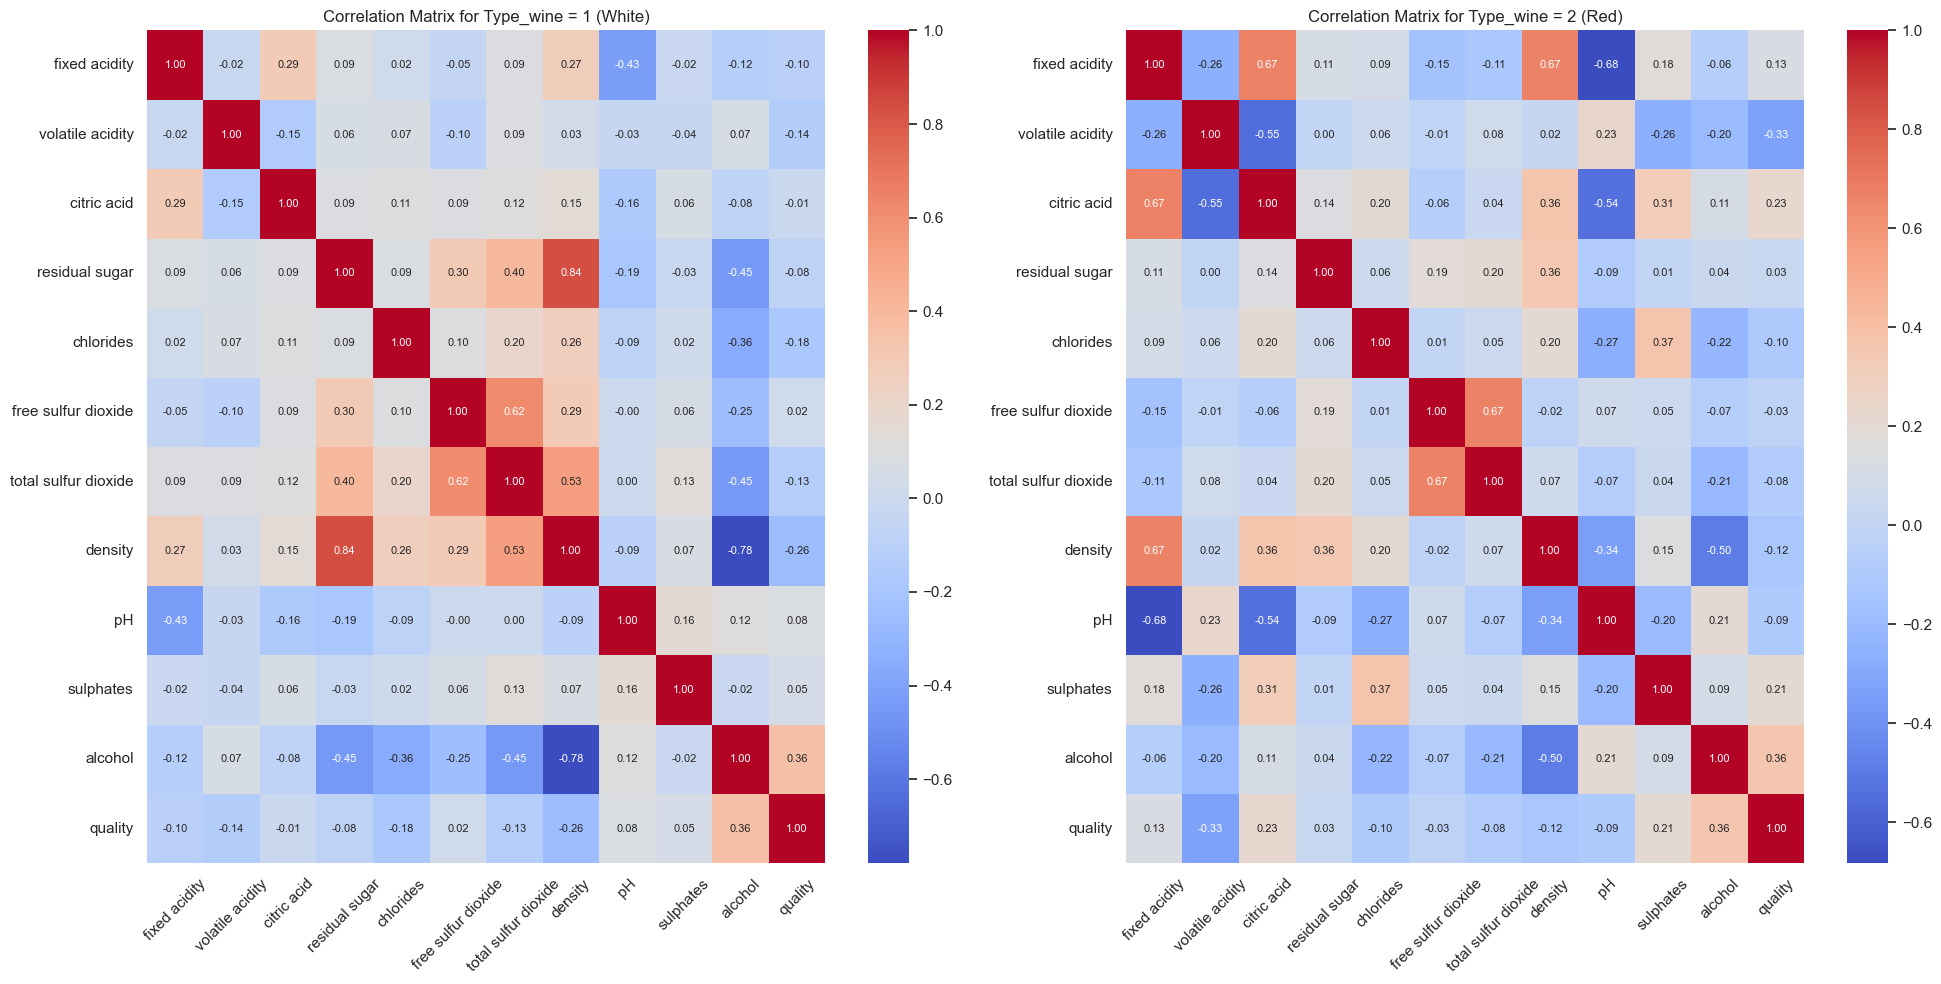

In [930]:
#Mapa de calor
# Eliminar la columna 'type_wine' antes de calcular la correlación
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Crear la figura y los subplots con un tamaño mayor
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapa de calor para type_wine = 1 con rotación en las etiquetas
sns.heatmap(corr_type1, annot=True, cmap='coolwarm', ax=axes[0], fmt=".2f", annot_kws={"size": 8})
axes[0].set_title('Correlation Matrix for Type_wine = 1 (White)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Mapa de calor para type_wine = 2 con rotación en las etiquetas
sns.heatmap(corr_type2, annot=True, cmap='coolwarm', ax=axes[1], fmt=".2f", annot_kws={"size": 8})
axes[1].set_title('Correlation Matrix for Type_wine = 2 (Red)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

Por temas de visualización y para hacer un contraste mejor, calculamos la matriz completa

In [931]:
# Calcular la matriz de correlación para cada tipo de vino
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Mostrar la matriz de correlación para type_wine = 1
print("Matriz de correlación para type_wine = 1 (White):")
print(corr_type1)
print("\n" + "="*50 + "\n")

# Mostrar la matriz de correlación para type_wine = 2
print("Matriz de correlación para type_wine = 2 (Red):")
print(corr_type2)

Matriz de correlación para type_wine = 1 (White):
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.101283         -0.135744    -0.013530   

                      residual sugar  c

Se procede a ver las variables con mayor correlación con nuestra variable de interés que es la calidad

In [932]:
# Calcular la matriz de correlación para cada tipo de vino
corr_type1 = df_wine_total[df_wine_total['type_wine'] == 1].drop(columns=['type_wine']).corr()
corr_type2 = df_wine_total[df_wine_total['type_wine'] == 2].drop(columns=['type_wine']).corr()

# Variables mejor relacionadas con 'quality' para type_wine = 1
correlaciones_type1 = corr_type1['quality'].sort_values(ascending=False)
print("\nCorrelaciones con respecto a 'quality' para type_wine = 1 (White):")
print(correlaciones_type1)

# Variables mejor relacionadas con 'quality' para type_wine = 2
correlaciones_type2 = corr_type2['quality'].sort_values(ascending=False)
print("\nCorrelaciones con respecto a 'quality' para type_wine = 2 (Red):")
print(correlaciones_type2)


Correlaciones con respecto a 'quality' para type_wine = 1 (White):
quality                 1.000000
alcohol                 0.358793
pH                      0.084344
sulphates               0.051121
free sulfur dioxide     0.019998
citric acid            -0.013530
residual sugar         -0.077828
fixed acidity          -0.101283
total sulfur dioxide   -0.126677
volatile acidity       -0.135744
chlorides              -0.177527
density                -0.256636
Name: quality, dtype: float64

Correlaciones con respecto a 'quality' para type_wine = 2 (Red):
quality                 1.000000
alcohol                 0.361363
citric acid             0.228930
sulphates               0.205409
fixed acidity           0.125886
residual sugar          0.030153
free sulfur dioxide    -0.025075
total sulfur dioxide   -0.081960
pH                     -0.093946
chlorides              -0.098829
density                -0.123566
volatile acidity       -0.333816
Name: quality, dtype: float64


En la imagen, se muestra la correlación entre distintas variables y la calidad (quality) para dos tipos de vino: blanco (type_wine = 1) y tinto (type_wine = 2). A continuación, se analiza cada tipo:

**1. Vino Blanco (type_wine = 1)**

**Alcohol (0.358793):** Existe una correlación positiva moderada entre el contenido de alcohol y la calidad. Esto indica que, en general, los vinos blancos con mayor contenido de alcohol tienden a tener mejor calidad.

**pH (0.084344) y Sulphates (0.051121):** Tienen una correlación positiva muy baja con la calidad, lo que sugiere una relación débil con la calidad.

**Densidad (-0.256636) y Cloruros (-0.177527):** Presentan correlaciones negativas moderadas, lo que indica que una mayor densidad y contenido de cloruros se asocian con una menor calidad en el vino blanco.

**Ácido volátil (-0.135744) y Dióxido de azufre total (-0.126677):** Estas variables también tienen correlaciones negativas bajas con la calidad, sugiriendo que altos valores de estas características pueden disminuir la calidad del vino blanco.

**2. Vino Tinto (type_wine = 2)**

**Alcohol (0.361363):** Al igual que con el vino blanco, el contenido de alcohol muestra una correlación positiva moderada con la calidad, lo que indica que un mayor contenido de alcohol se asocia con una mejor calidad en el vino tinto.

**Ácido cítrico (0.228930) y Sulphates (0.205490):** Tienen correlaciones positivas bajas a moderadas con la calidad, lo que indica una ligera tendencia a que valores altos de estas variables mejoren la calidad del vino tinto.

**Ácido volátil (-0.333816):** Presenta una correlación negativa relativamente fuerte con la calidad. Esto sugiere que un mayor contenido de ácido volátil puede reducir la calidad del vino tinto, siendo un factor importante a considerar.

**Densidad (-0.123566):** Tiene una correlación negativa baja, indicando que los vinos tintos con menor densidad tienden a tener una calidad ligeramente superior.

**Conclusiones**

Alcohol es la variable con mayor correlación positiva con la calidad en ambos tipos de vino. Esto sugiere que el contenido de alcohol es un factor importante en la percepción de calidad tanto para el vino blanco como para el tinto.
Para el vino blanco, las variables relacionadas con la acidez y los cloruros muestran correlaciones negativas con la calidad, aunque no son particularmente fuertes.

Para el vino tinto, el ácido volátil tiene una correlación negativa más pronunciada, indicando que afecta de manera significativa la calidad. Además, el ácido cítrico y los sulfatos tienen una leve relación positiva con la calidad.

Este análisis de correlaciones permite identificar qué variables podrían ser más relevantes para predecir o mejorar la calidad de los vinos blancos y tintos.

## **Modelos**

### **Separación de Variables y Objetivo**

In [933]:
# Dividir en características (X) y variable objetivo (y) VINO BLANCO
X = df_num_type1.drop("quality", axis=1)
y = df_num_type1['quality']
#------------------------

# Dividir en características (X1) y variable objetivo (y1) VINO TINTO 
X1 = df_num_type2.drop("quality", axis=1)
y1 = df_num_type2['quality']

### **Definición de Estrategia de Preprocesamiento**

Aquí definimos diferentes estrategias de preprocesamiento para diferentes tipos de variables:

- Las variables categóricas necesitan ser codificadas utilizando técnicas como OneHotEncoder o OrdinalEncoder.
- Las variables numéricas pueden ser escaladas utilizando StandardScaler o MinMaxScaler.
- También es importante manejar los valores faltantes utilizando imputadores.

Creamos uno para el vino blanco y otro para el vino tinto

In [934]:

# Definimos las variables categóricas y numéricas
#categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns # VINO BLANCO
numerical_features_r = X1.select_dtypes(include=['int64', 'float64']).columns # VINO TINTO
 
# Creamos pipelines de preprocesamiento VINO BLANCO
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creamos pipelines de preprocesamiento VINO TINTO
numerical_transformer_r = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

 
# Usamos ColumnTransformer para combinar ambas transformaciones VINO BLANCO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)#,
    #    ('cat', categorical_transformer, categorical_features)
    ])

# Usamos ColumnTransformer para combinar ambas transformaciones VINO TINTO
preprocessor_r = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_r, numerical_features_r)#,
    #    ('cat', categorical_transformer, categorical_features)
    ])

### **Creación del Pipeline**


Vino Blanco

In [935]:
# Definimos el pipeline completo Vino blanco
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

Vino Tinto

In [936]:
# Definimos el pipeline completo Vino Tinto
model_pipeline_r = Pipeline(steps=[('preprocessor', preprocessor_r)])

### **Entrenamiento de Modelos con el Pipeline**
Ahora que tenemos el pipeline de preprocesamiento configurado, vamos a entrenar un modelo. En este caso, usaremos un **RandomForestClassifier**, un algoritmo robusto y eficiente para tareas de clasificación.

#### **Modelos RandomForestClassifier**

Vino Blanco

In [937]:
model_pipeline.fit_transform(X) # Vino blanco

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

Vino Tinto

In [938]:
model_pipeline_r.fit_transform(X1) # Vino tinto

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

Vino Blanco

In [939]:
# Vino Blanco
model_pipeline.fit_transform(X).shape

(4898, 11)

Vino Tinto

In [940]:
# Vino Tinto
model_pipeline_r.fit_transform(X1).shape

(1599, 11)

**Vino Blanco modelo RandomForest**

In [941]:
# Vino Blanco modelo RandomForest
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Evaluamos el rendimiento del modelo
#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.57      0.13      0.22        30
           2       0.87      0.96      0.91       723
           3       0.85      0.67      0.75       227

    accuracy                           0.87       980
   macro avg       0.76      0.59      0.62       980
weighted avg       0.86      0.87      0.85       980



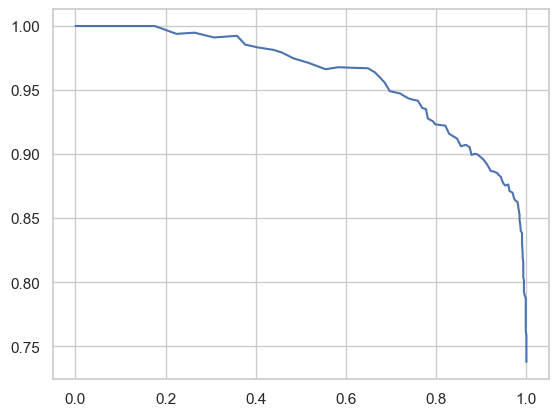

In [942]:
## Gráfico de PR Vino Blanco modelo RandomForest
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision, recall, thresholds = precision_recall_curve(y_test==2, model_pipeline.predict_proba(X_test)[:,1])
 
plt.plot(recall, precision)
plt.show()

0.917799352750809


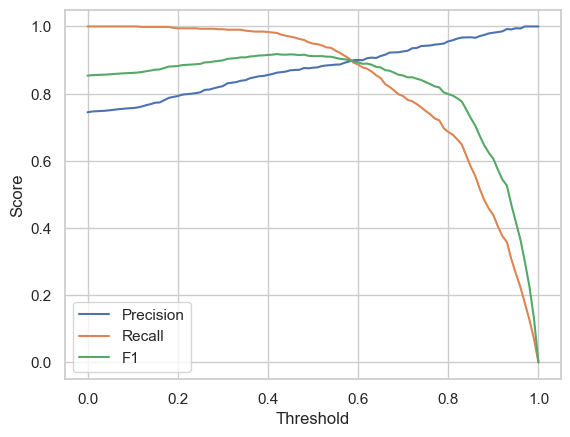

In [943]:
# Grafiquemos Precisión, Recall con thresholds en el eje X

f1=2*(precision*recall)/(precision+recall)

max_f1=np.max(f1)
print(max_f1)

plt.plot(thresholds, precision[1:], label='Precision')
plt.plot(thresholds, recall[1:], label='Recall')
plt.plot(thresholds, f1[1:], label='F1')


plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()
plt.show()

In [944]:
### TESTEO VS PREDICCIÓN VINO BLANCO modelo RandomForest

df_VB_test = pd.DataFrame()

df_VB_test['Real']=y_test
df_VB_test['Prediccion']=y_pred

df_VB_test

,Real,Prediccion
4656,3,3
3659,3,3
907,3,3
4352,2,2
3271,3,3
...,...,...
3207,2,2
1539,2,2
964,2,2
168,2,2


In [945]:
# Matriz confusión VINO BLANCO modelo RandomForest
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  4,  26,   0],
       [  3, 693,  27],
       [  0,  76, 151]], dtype=int64)

**Vino Tinto modelo RandomForest**

In [946]:
# Vino tinto modelo RandomForest
# Dividimos los datos en entrenamiento y prueba
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Creamos un nuevo pipeline que incluye el preprocesamiento y el modelo
model_pipeline_r = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Entrenamos el pipeline completo en los datos de entrenamiento
model_pipeline_r.fit(X_train_r, y_train_r)

# Hacemos predicciones en el conjunto de prueba
y_pred_r = model_pipeline_r.predict(X_test_r)

# Evaluamos el rendimiento del modelo
#print(classification_report(y_test, y_pred))
print(classification_report(y_test_r, y_pred_r, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.89      0.96      0.92       262
           3       0.71      0.57      0.64        47

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



In [947]:
y1.value_counts()

quality
2    1319
3     217
1      63
Name: count, dtype: int64

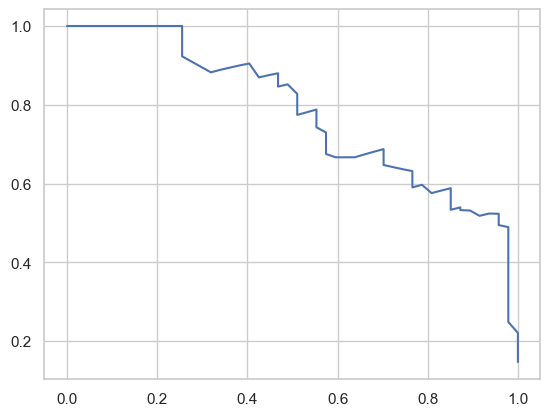

In [951]:
## Gráfico de PR Vino Tinto modelo RandomForest
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision1, recall1, thresholds1 = precision_recall_curve(y_test_r==3, model_pipeline_r.predict_proba(X_test_r)[:,2])
 
plt.plot(recall1, precision1)
plt.show()

0.6956521739130435


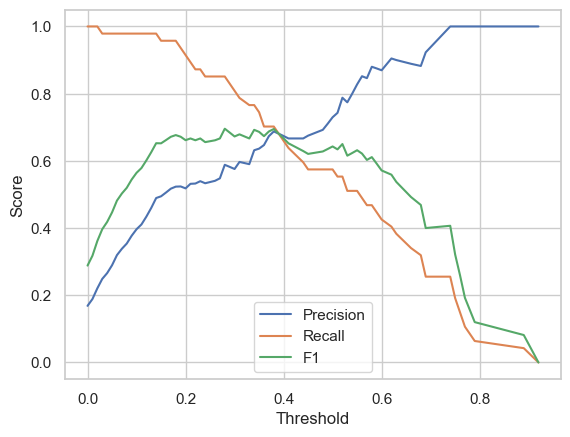

In [953]:
# Grafiquemos Precisión, Recall con thresholds en el eje X

f1=2*(precision1*recall1)/(precision1+recall1)

max_f1=np.max(f1)
print(max_f1)

plt.plot(thresholds1, precision1[1:], label='Precision')
plt.plot(thresholds1, recall1[1:], label='Recall')
plt.plot(thresholds1, f1[1:], label='F1')


plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()
plt.show()

In [886]:
### TESTEO VS PREDICCION VINO TINTO modelo RandomForest

df_VR_test = pd.DataFrame()

df_VR_test['Real']=y_test_r
df_VR_test['Prediccion']=y_pred_r

df_VR_test

,Real,Prediccion
803,2,2
124,2,2
350,2,2
682,2,2
1326,2,2
...,...,...
1259,2,2
1295,2,2
1155,2,2
963,2,2


In [887]:
# Matriz confusion VINO TINTO modelo RandomForest
confusion_matrix(y_test_r,y_pred_r)

array([[  0,  11,   0],
       [  0, 251,  11],
       [  0,  20,  27]], dtype=int64)

#### **Modelos Regresión Logística**

**Vino Blanco modelo Regresión Logística**

In [888]:
# Vino Blanco Regresión Logística
## Regresón Logistica

from sklearn.linear_model import LogisticRegression

# Escalar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo con un número mayor de iteraciones
clf = LogisticRegression(random_state=42, max_iter=500)  # Aumenta max_iter a 500
clf.fit(X_train_l, y_train_l)

# Predicción
y_pred_l = clf.predict(X_test_l)

# Evaluación
print(classification_report(y_test_l, y_pred_l, zero_division=0))

              precision    recall  f1-score   support

           1       0.33      0.03      0.06        30
           2       0.78      0.93      0.85       723
           3       0.58      0.29      0.38       227

    accuracy                           0.76       980
   macro avg       0.56      0.42      0.43       980
weighted avg       0.72      0.76      0.72       980



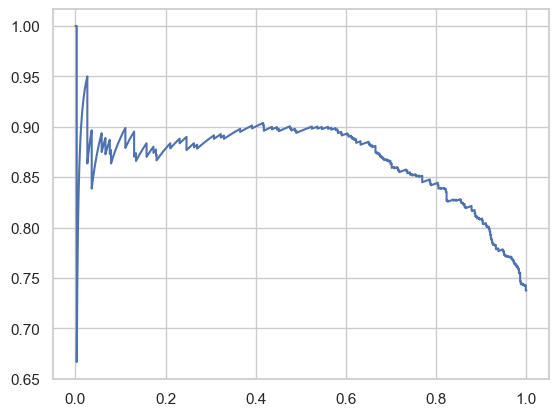

In [955]:
## Gráfico de PR Vino Blanco Regresón Logistica
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision2, recall2, thresholds2 = precision_recall_curve(y_test_l==2, clf.predict_proba(X_test_l)[:,1])
 
plt.plot(recall2, precision2)
plt.show()

0.8576687116564418


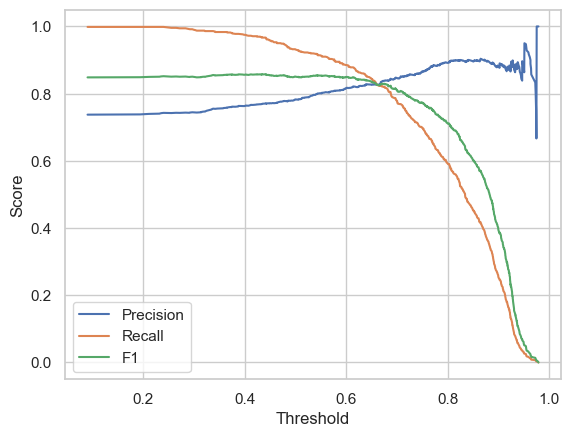

In [956]:
# Grafiquemos Precisión, Recall con thresholds en el eje X

f1=2*(precision2*recall2)/(precision2+recall2)

max_f1=np.max(f1)
print(max_f1)

plt.plot(thresholds2, precision2[1:], label='Precision')
plt.plot(thresholds2, recall2[1:], label='Recall')
plt.plot(thresholds2, f1[1:], label='F1')


plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()
plt.show()

In [890]:
### TESTEO VS PREDICCION VINO BLANCO modelo Regresón Logistica

df_VB_test_l = pd.DataFrame()

df_VB_test_l['Real']=y_test_l
df_VB_test_l['Prediccion']=y_pred_l

df_VB_test_l

,Real,Prediccion
4656,3,2
3659,3,2
907,3,2
4352,2,2
3271,3,2
...,...,...
3207,2,2
1539,2,2
964,2,2
168,2,2


In [891]:
# Matriz confusion VINO BLANCO modelo Regresón Logistica
confusion_matrix(y_test_l,y_pred_l)

array([[  1,  28,   1],
       [  2, 675,  46],
       [  0, 162,  65]], dtype=int64)

**Vino Tinto modelo Regresión Logística**

In [892]:
# Vino Tinto Regresón Logistica
## Regresón Logistica

from sklearn.linear_model import LogisticRegression

# Escalar los datos numéricos
scaler = StandardScaler()
X_scaled_r = scaler.fit_transform(X1)

# Dividir los datos en entrenamiento y prueba
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled_r, y1, test_size=0.2, random_state=42)

# Crear y entrenar el modelo con un número mayor de iteraciones
clf_r = LogisticRegression(random_state=42, max_iter=500)  # Aumenta max_iter a 500
clf_r.fit(X_train_r, y_train_r)

# Predicción
y_pred_r = clf.predict(X_test_r)

# Evaluación
print(classification_report(y_test_r, y_pred_r, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.86      0.82      0.84       262
           3       0.33      0.49      0.40        47

    accuracy                           0.75       320
   macro avg       0.40      0.44      0.41       320
weighted avg       0.75      0.75      0.75       320



c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


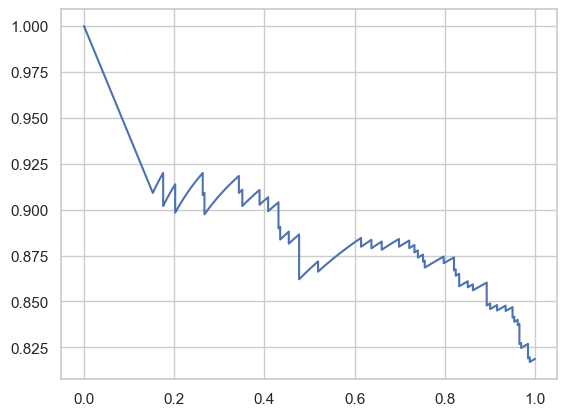

In [957]:
## Gráfico de PR Vino Rojo Regresón Logistica
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
 
precision3, recall3, thresholds3 = precision_recall_curve(y_test_r==2, clf_r.predict_proba(X_test_r)[:,1])
 
plt.plot(recall3, precision3)
plt.show()

0.9003436426116838


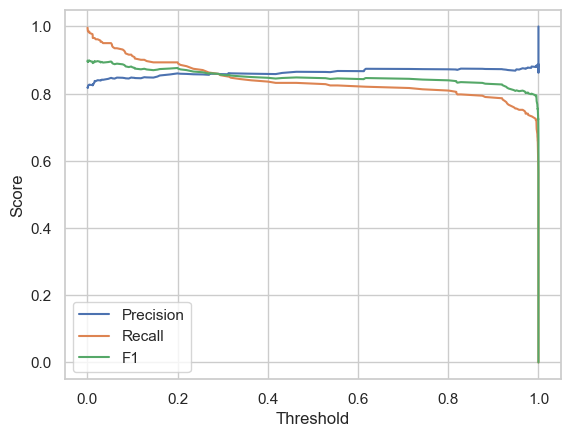

In [959]:
# Grafiquemos Precisión, Recall con thresholds en el eje X

f1=2*(precision3*recall3)/(precision3+recall3)

max_f1=np.max(f1)
print(max_f1)

plt.plot(thresholds3, precision3[1:], label='Precision')
plt.plot(thresholds3, recall3[1:], label='Recall')
plt.plot(thresholds3, f1[1:], label='F1')


plt.xlabel('Threshold')
plt.ylabel('Score')

plt.legend()
plt.show()

In [894]:
### TESTEO VS PREDICCION VINO TINTO modelo Regresón Logistica

df_VR_test_l = pd.DataFrame()

df_VR_test_l['Real']=y_test_r
df_VR_test_l['Prediccion']=y_pred_r

df_VR_test_l

,Real,Prediccion
803,2,2
124,2,2
350,2,2
682,2,2
1326,2,2
...,...,...
1259,2,2
1295,2,3
1155,2,2
963,2,2


In [895]:
# Matriz confusion VINO TINTO modelo Regresón Logistica
confusion_matrix(y_test_r,y_pred_r)

array([[  0,  11,   0],
       [  0, 216,  46],
       [  0,  24,  23]], dtype=int64)